In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('C:/Users/teeyob/Rossmann_Sales_Forecasting/scripts'))

In [2]:
test=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/test.csv')
train=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/train.csv')
store=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/store.csv')

C:\Users\teeyob\AppData\Local\Temp\ipykernel_18496\1489791278.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/train.csv')


In [3]:
train_store_merged = pd.merge(train, store, on='Store', how='left')
train_store_merged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


check missing value

In [4]:
train_store_merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

check duplicated 

In [5]:
train_store_merged.loc[train_store_merged.duplicated(keep=False), :]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [6]:
train_store_merged.shape
train_store_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [7]:
train_store_merged[train_store_merged.CompetitionDistance.isnull()].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


Handling Missing Value

In [8]:
train_store_merged.shape
from Data_cleaning import preprocess_data
preprocess_data(train_store_merged)

C:\Users\teeyob\Rossmann_Sales_Forecasting\scripts\Data_cleaning.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Season
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,31,31,7,2015,Summer
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,31,7,2015,Summer
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,31,7,2015,Summer
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,0.0,0.0,0,31,31,7,2015,Summer
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,0.0,0.0,0,31,31,7,2015,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,1,2013,Winter
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,0.0,0.0,0,1,1,1,2013,Winter
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0,0.0,0.0,0,1,1,1,2013,Winter
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0.0,0,0.0,0.0,0,1,1,1,2013,Winter


Verify there is no null value

In [9]:
train_store_merged.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
dtype: int64

Exploratory Data Analysis

Compare Promotion Distribution in Train and Test Data

In [10]:
from Eda_Functions import compare_promo_distribution
compare_promo_distribution(train_store_merged,test)

Promotion Distribution in Train Dataset:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Promotion Distribution in Test Dataset:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


Sales Before, During, and After Holidays

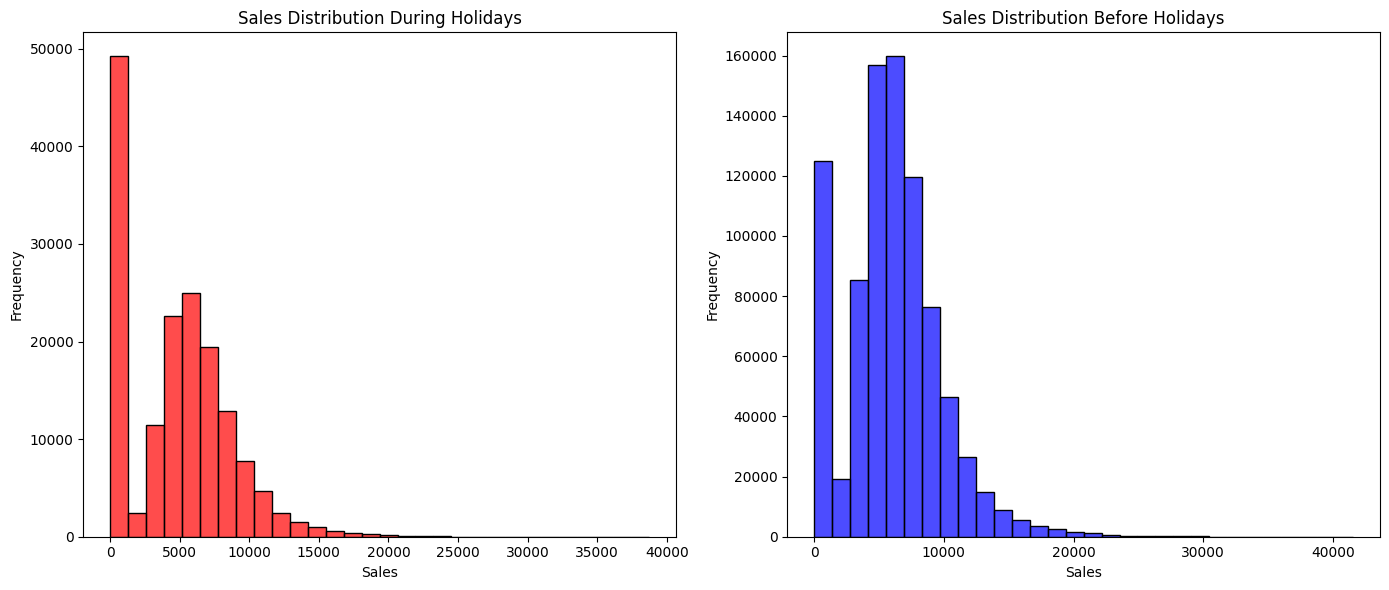

Average Sales Before Holidays: 5980.279716566853
Average Sales During Holidays: 4684.874236685952


In [11]:
from Eda_Functions import holiday_sales_analysis
holiday_sales_analysis(train_store_merged)

Analyze Seasonal Purchase Behaviors

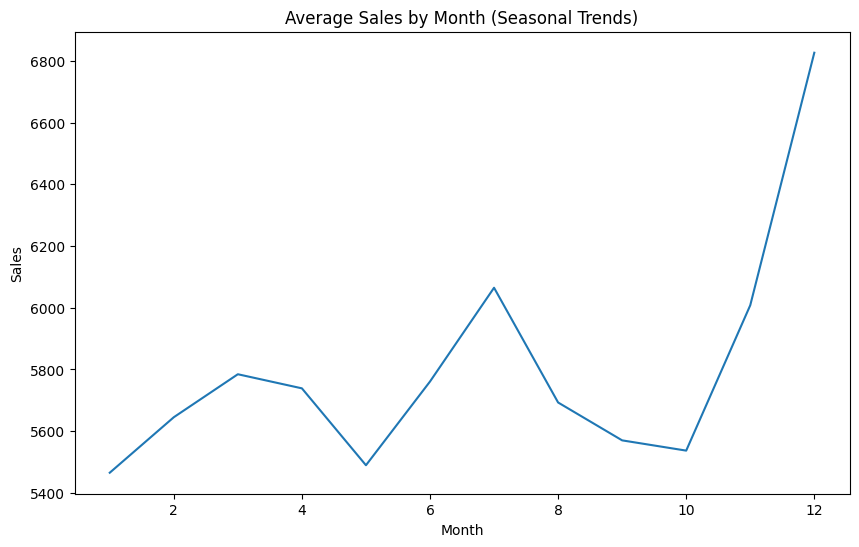

In [12]:
from Eda_Functions import seasonal_trends_analysis
seasonal_trends_analysis(train_store_merged)


Correlation Between Sales and Customers

Correlation Between Sales and Customers: 
              Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


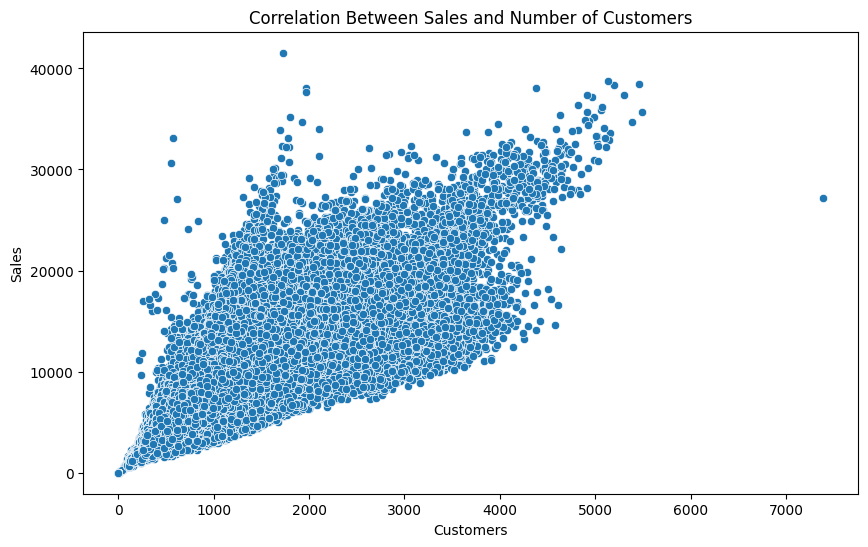

In [13]:
from Eda_Functions import sales_customers_correlation
sales_customers_correlation(train_store_merged)

Analyze Impact of Promotions on Sales

Summary of Sales and Customers (with and without promo):


Promo        Sales                                   Customers         \
                mean  median          std min    max        mean median   
0     0  4406.050805  4622.0  3442.450020   0  41551  517.823542  512.0   
1     1  7991.152046  7553.0  3419.025495   0  38722  820.098815  747.0   

                         
          std min   max  
0  452.881419   0  5387  
1  419.897191   0  7388

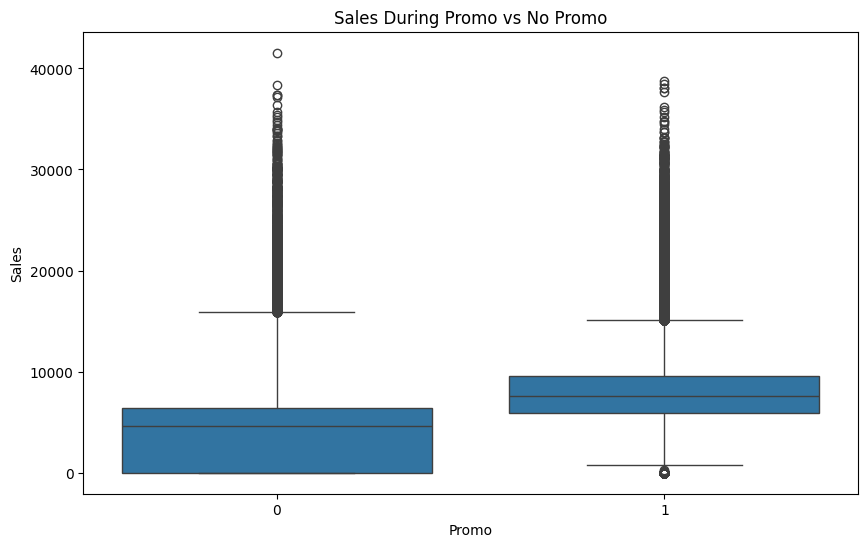

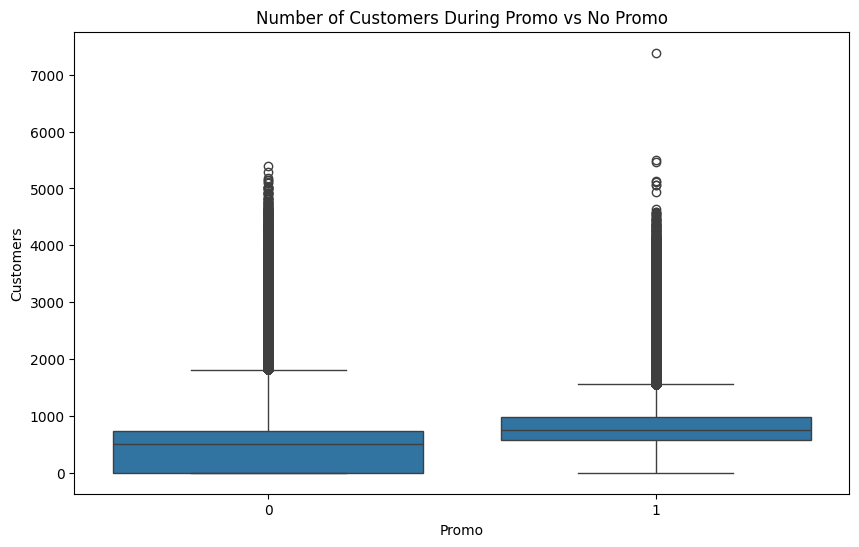

In [14]:
from Eda_Functions import promotions_sales_analysis
promotions_sales_analysis(train_store_merged)



Identify Stores for Effective Promotion Deployment

In [15]:
from Eda_Functions import effective_promo_stores
effective_promo_stores(train_store_merged)


Top 10 Stores for Promo Effectiveness:


Promo,0,1,Promo_Effectiveness
Store,,,
817,14043.338488,24679.566667,10636.228179
261,6694.369416,16478.113889,9783.744473
544,8329.314433,17072.355556,8743.041123
1014,6853.450172,15334.427778,8480.977606
963,5758.707904,13982.883333,8224.175430
788,11869.646048,19927.797222,8058.151174
335,10306.773196,18175.525000,7868.751804
251,12810.092784,20670.544444,7860.451661
513,12155.924399,19937.938889,7782.014490


Sales Behavior During Store Opening/Closing Times

In [16]:
from Eda_Functions import open_closed_sales_analysis
open_closed_sales_analysis(train_store_merged)

Average Sales When Stores Are Open: 6955.514290755952
Average Sales When Stores Are Closed: 0.0


Effect of Assortment on Sales

Summary of Sales by Assortment Level:


Assortment        Sales                                
                     mean  median          std min    max
0          a  5481.026096  5463.0  3682.766186   0  38722
1          b  8553.931999  8026.5  3882.418206   0  22137
2          c  6058.676567  6039.0  3992.255662   0  41551

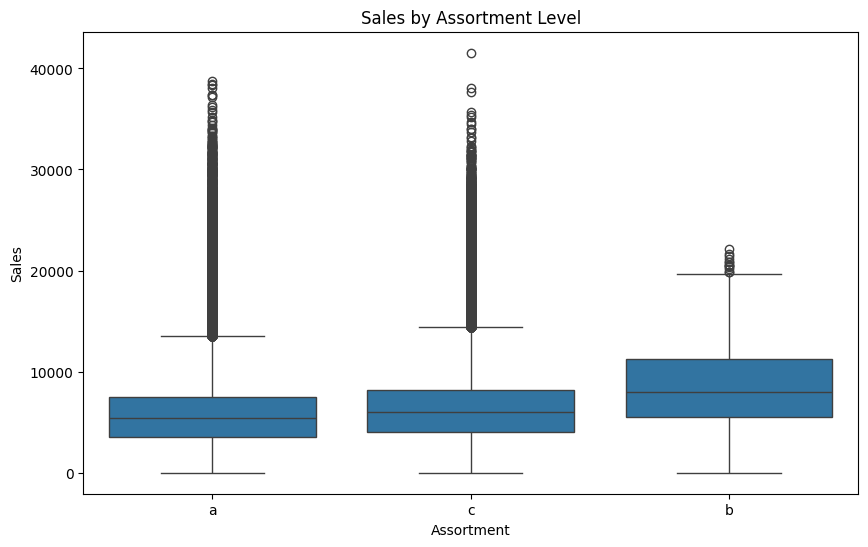

In [17]:
from Eda_Functions import assortment_sales_analysis
assortment_sales_analysis(train_store_merged)

Effect of Competitor Distance on Sales

Summary of Sales by Competition Distance:


C:\Users\teeyob\Rossmann_Sales_Forecasting\scripts\Eda_Functions.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_summary = train_store_merged.groupby(pd.cut(train_store_merged['CompetitionDistance'], bins=5)).agg({


CompetitionDistance        Sales                                  \
                              mean  median          std min    max   
0   (-55.84, 15188.0]  5769.667405  5729.0  3861.843756   0  41551   
1  (15188.0, 30356.0]  5859.219512  5954.0  3787.682729   0  37646   
2  (30356.0, 45524.0]  5531.206271  5361.0  3630.771960   0  31311   
3  (45524.0, 60692.0]  5131.027070  5160.0  2993.758094   0  20082   
4  (60692.0, 75860.0]  7321.466030  7043.5  3300.545896   0  19807   

  CompetitionDistance  
                count  
0              909939  
1               90314  
2               12246  
3                3768  
4                 942

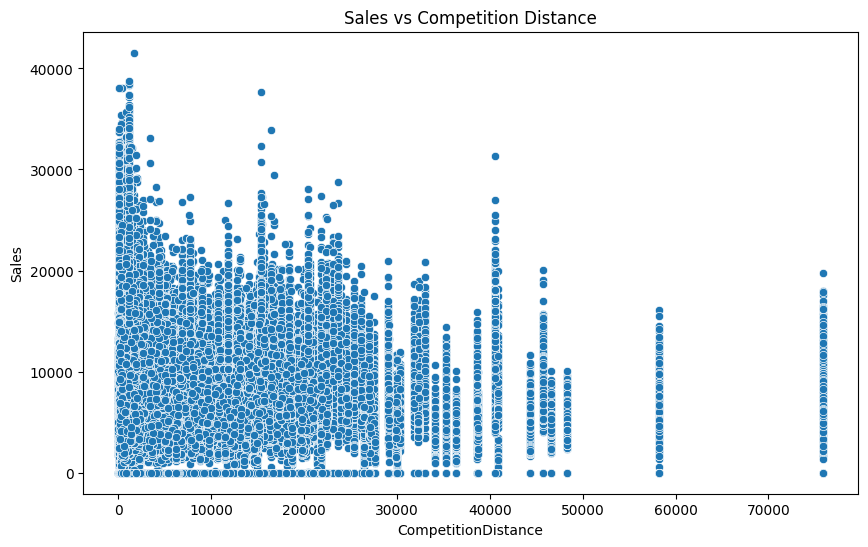

In [18]:
from Eda_Functions import competitor_distance_sales_analysis
competitor_distance_sales_analysis(train_store_merged)

Sales Before and After Competitor Opening

In [19]:
from Eda_Functions import competitor_opening_analysis
competitor_opening_analysis(train_store_merged)

Average Sales Before Competitor Opening: nan
Average Sales After Competitor Opening: 5773.818972305593


Analyze Weekly Sales

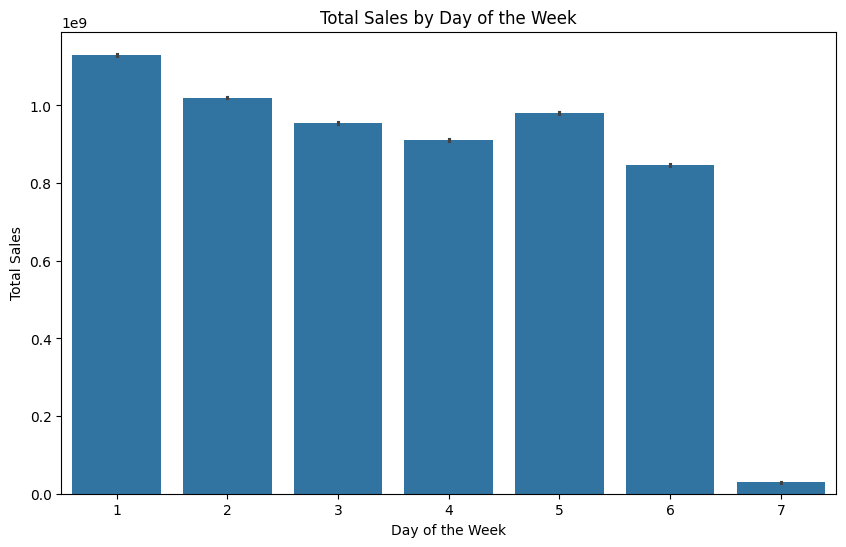

Weekly Sales Summary Table (Sorted):
   DayOfWeek  Total Sales
3     Sunday     29551433
2   Saturday    846317735
4   Thursday    911177709
6  Wednesday    954962863
0     Friday    980555941
5    Tuesday   1020411930
1     Monday   1130203012


In [20]:
from Eda_Functions import analyze_weekly_sales
analyze_weekly_sales(train_store_merged)


Analyze Store Type And Sales

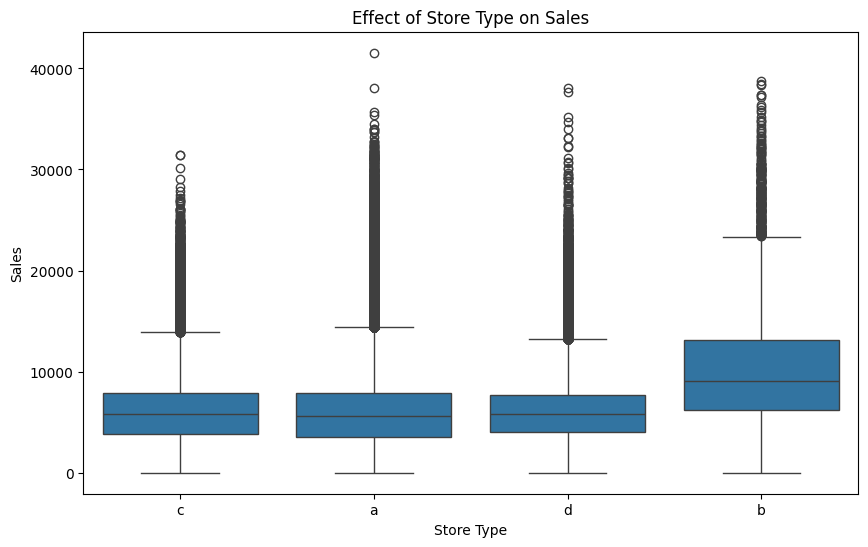

Sales Summary by Store Type (Sorted by Average Sales):


,StoreType,Total Sales,Average Sales,Median Sales,Sales Std Dev,Number of Records
3,d,1765392943,5641.819243,5826.0,3473.393781,312912
2,c,783221426,5723.629246,5766.0,3721.700886,136840
0,a,3165334859,5738.179710,5618.0,3964.028134,551627
1,b,159231395,10058.837334,9025.5,5280.525506,15830


In [21]:
from Eda_Functions import analyze_store_type_sales
analyze_store_type_sales(train_store_merged)


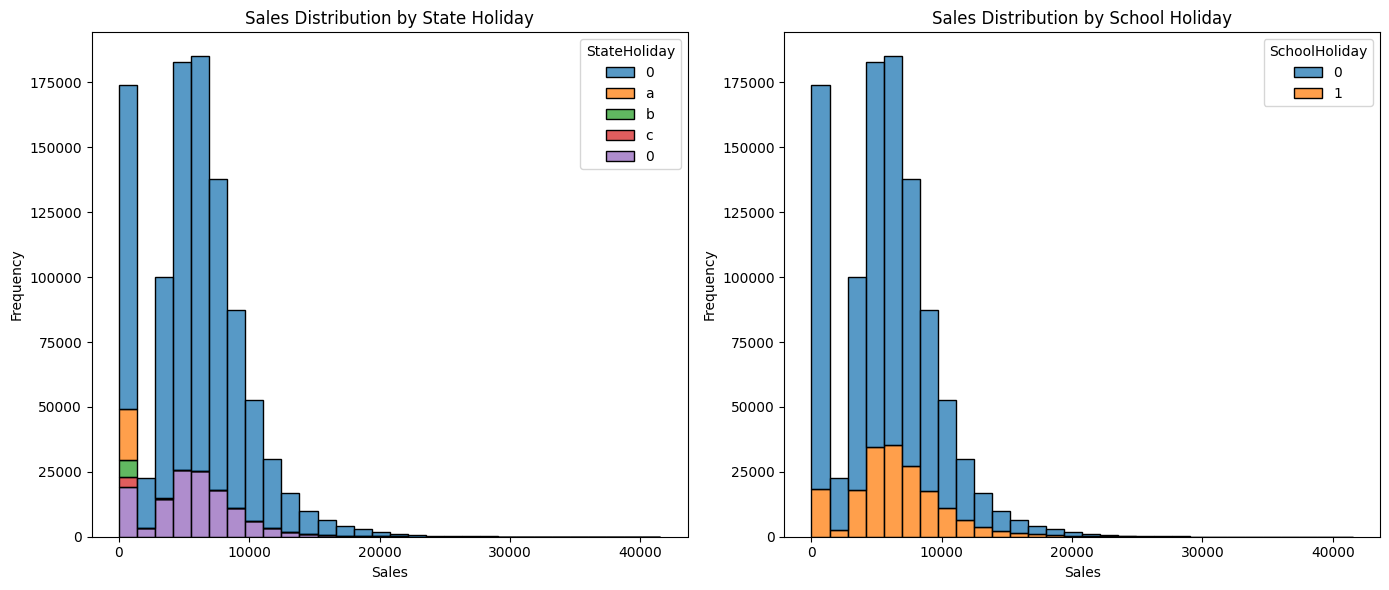

Sales Summary by State Holiday (Sorted by Average Sales):


,StateHoliday,Total Sales,Average Sales,Median Sales,Sales Std Dev,Number of Records
4,c,691806,168.733171,0.0,1492.274865,4100
3,b,1433744,214.311510,0.0,1816.918138,6690
2,a,5890305,290.735686,0.0,1870.281698,20260
0,0,751505326,5733.530624,5674.0,3577.181723,131072
1,0,5113659442,5980.279717,5878.0,3795.212733,855087



Sales Summary by School Holiday (Sorted by Average Sales):


,SchoolHoliday,Total Sales,Average Sales,Median Sales,Sales Std Dev,Number of Records
0,0,4696260531,5620.979034,5642.0,3862.873159,835488
1,1,1176920092,6476.522207,6197.0,3709.677337,181721


In [22]:
from Eda_Functions import analyze_holiday_impact
analyze_holiday_impact(train_store_merged)


In [25]:
train_store_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Week', 'Month', 'Year',
       'Season'],
      dtype='object')

In [26]:
train_store_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  object        
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no